# Arewa Data Science Academy
### Deep Learning Cohort2.0
### Name: Ahmad Wafiq Saad
### Title: Week 2 Solution

### Exercises Solution

1. Create a straight line dataset using the linear regression formula (weight * X + bias).
- Set weight=0.3 and bias=0.9 there should be at least 100 datapoints total.
- Split the data into 80% training, 20% testing.
- Plot the training and testing data so it becomes visual.

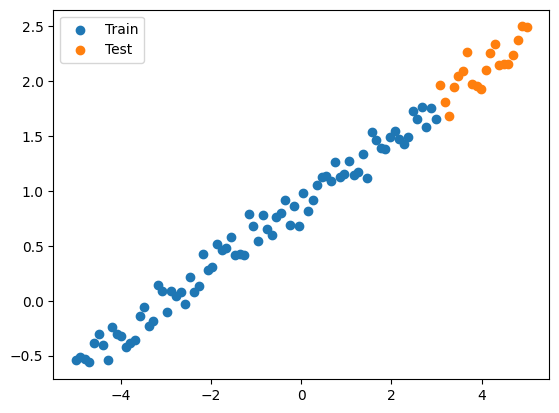

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

# Set parameters
weight = 0.3
bias = 0.9
num_datapoints = 100

# Generate data
X = torch.linspace(-5, 5, num_datapoints).unsqueeze(1)  # Create a tensor of 100 evenly spaced values between -5 and 5
y = weight * X + bias + torch.randn(num_datapoints, 1) * 0.1  # Add some noise to the data

# Split data into training and testing sets
train_size = int(0.8 * num_datapoints)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Plot the data
plt.scatter(X_train, y_train, label='Train')
plt.scatter(X_test, y_test, label='Test')
plt.legend()
plt.show()

2. Build a PyTorch model by subclassing nn.Module.
- Inside should be a randomly initialized nn.Parameter() with requires_grad=True, one for weights and one for bias.
- Implement the forward() method to compute the linear regression function you used to create the dataset in 1.
- Once you've constructed the model, make an instance of it and check its state_dict().
- Note: If you'd like to use nn.Linear() instead of nn.Parameter() you can.

In [2]:
class LinearRegression(torch.nn.Module):
    def __init__(self):
        super(LinearRegression, self).__init__()
        self.weight = torch.nn.Parameter(torch.randn(1, requires_grad=True))
        self.bias = torch.nn.Parameter(torch.randn(1, requires_grad=True))

    def forward(self, x):
        return self.weight * x + self.bias

# Create an instance of the model
model = LinearRegression()

# Check the model's state_dict
print(model.state_dict())

OrderedDict({'weight': tensor([0.3098]), 'bias': tensor([0.1457])})


3. Create a loss function and optimizer using nn.L1Loss() and torch.optim.SGD(params, lr) respectively.
- Set the learning rate of the optimizer to be 0.01 and the parameters to optimize should be the model parameters from the model you created in 2.
- Write a training loop to perform the appropriate training steps for 300 epochs.
- The training loop should test the model on the test dataset every 20 epochs.

In [3]:
# Define loss function and optimizer
criterion = torch.nn.L1Loss()  # Use L1 loss (MAE)
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

epochs = 300

for epoch in range(epochs):
    # Forward pass
    y_pred = model(X_train)

    # Calculate loss
    loss = criterion(y_pred, y_train)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Test every 20 epochs
    if epoch % 20 == 0:
        with torch.no_grad():
            y_test_pred = model(X_test)
            test_loss = criterion(y_test_pred, y_test)
            print(f'Epoch [{epoch}/{epochs}], Train Loss: {loss.item():.4f}, Test Loss: {test_loss.item():.4f}')

Epoch [0/300], Train Loss: 0.7611, Test Loss: 0.7565
Epoch [20/300], Train Loss: 0.4464, Test Loss: 1.1185
Epoch [40/300], Train Loss: 0.3367, Test Loss: 0.8281
Epoch [60/300], Train Loss: 0.2322, Test Loss: 0.5563
Epoch [80/300], Train Loss: 0.1382, Test Loss: 0.2982
Epoch [100/300], Train Loss: 0.0932, Test Loss: 0.1457
Epoch [120/300], Train Loss: 0.0862, Test Loss: 0.1111
Epoch [140/300], Train Loss: 0.0856, Test Loss: 0.1081
Epoch [160/300], Train Loss: 0.0854, Test Loss: 0.1072
Epoch [180/300], Train Loss: 0.0854, Test Loss: 0.1070
Epoch [200/300], Train Loss: 0.0854, Test Loss: 0.1070
Epoch [220/300], Train Loss: 0.0854, Test Loss: 0.1071
Epoch [240/300], Train Loss: 0.0854, Test Loss: 0.1070
Epoch [260/300], Train Loss: 0.0854, Test Loss: 0.1070
Epoch [280/300], Train Loss: 0.0854, Test Loss: 0.1071


4. Make predictions with the trained model on the test data.
- Visualize these predictions against the original training and testing data (note: you may need to make sure the predictions are not on the GPU if you want to use non-CUDA-enabled libraries such as matplotlib to plot).

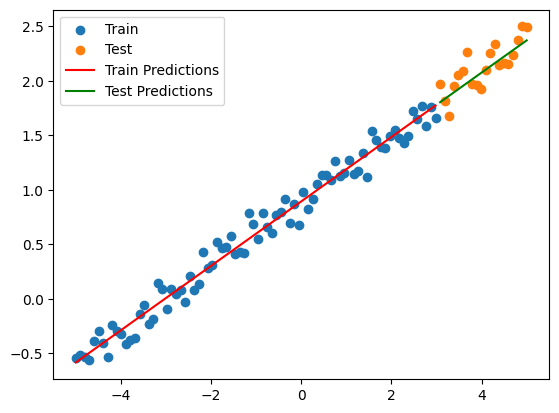

In [4]:
with torch.no_grad():
    y_pred_train = model(X_train).cpu().numpy()
    y_pred_test = model(X_test).cpu().numpy()

# Plot predictions
plt.scatter(X_train, y_train, label='Train')
plt.scatter(X_test, y_test, label='Test')
plt.plot(X_train, y_pred_train, color='red', label='Train Predictions')
plt.plot(X_test, y_pred_test, color='green', label='Test Predictions')
plt.legend()
plt.show()

5. Save your trained model's state_dict() to file.
- Create a new instance of your model class you made in 2. and load in the state_dict() you just saved to it.
- Perform predictions on your test data with the loaded model and confirm they match the original model predictions from 4.

In [5]:
# Save the model's state_dict
torch.save(model.state_dict(), 'linear_regression_model.pth')

# Load the saved state_dict into a new model instance
loaded_model = LinearRegression()
loaded_model.load_state_dict(torch.load('linear_regression_model.pth'))

# Make predictions with the loaded model
with torch.no_grad():
    loaded_model_preds = loaded_model(X_test).cpu().numpy()

# Compare predictions
print(f'Predictions match: {(y_pred_test == loaded_model_preds).all()}')

Predictions match: True


/tmp/ipykernel_13915/1719363427.py:6: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model.load_state_dict(torch.load('linear_regression_model.pth'))
